# Weighted Binary Presence

This analysis aims to identify whether counting object detecions adds value or noise to the model.

In [1]:
import os

import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

import egoviz.models.evaluation as ev
import egoviz.models.processing as pr
import egoviz.visualize as viz

SEED = 42

pd.set_option("display.max_rows", 300)

In [2]:
# load and process data
cwd = os.getcwd()
data = pr.load_pickle(os.path.join(cwd, '../data/home_data_all_preds_df.pkl'))

df = pr.generate_binary_presence_df(data)
df_weighted = pr.generate_binary_presence_df(data, weighted=True, weight=5)

df_scaled = pr.row_wise_min_max_scaling(df)
df_scaled_weighted = pr.row_wise_min_max_scaling(df_weighted)

In [3]:
# prepare data for evaluation
label_encoder = LabelEncoder()

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=SEED, class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(random_state=SEED, class_weight='balanced')),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=SEED)),
    ('XGBoost', XGBClassifier(random_state=SEED)),
    ('MLP', MLPClassifier(random_state=SEED, learning_rate='adaptive', max_iter=1000, early_stopping=True))
]

results, results_df = ev.evaluate_models(models, df_scaled, label_encoder)

2023-12-07 18:56:53,766 - root - INFO - LOGOCV complete for LogisticRegression
2023-12-07 18:56:59,414 - root - INFO - LOGOCV complete for RandomForestClassifier
2023-12-07 18:58:01,180 - root - INFO - LOGOCV complete for GradientBoostingClassifier
2023-12-07 18:58:06,495 - root - INFO - LOGOCV complete for XGBClassifier
2023-12-07 18:58:09,927 - root - INFO - LOGOCV complete for MLPClassifier


In [4]:
models_weighted = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=SEED, class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(random_state=SEED, class_weight='balanced')),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=SEED)),
    ('XGBoost', XGBClassifier(random_state=SEED)),
    ('MLP', MLPClassifier(random_state=SEED, learning_rate='adaptive', max_iter=1000, early_stopping=True))
]

results_weighted, results_df_weighted = ev.evaluate_models(models_weighted, df_scaled_weighted, label_encoder)

2023-12-07 18:58:10,349 - root - INFO - LOGOCV complete for LogisticRegression
2023-12-07 18:58:18,939 - root - INFO - LOGOCV complete for RandomForestClassifier
2023-12-07 18:59:53,609 - root - INFO - LOGOCV complete for GradientBoostingClassifier
2023-12-07 18:59:59,985 - root - INFO - LOGOCV complete for XGBClassifier
2023-12-07 19:00:02,430 - root - INFO - LOGOCV complete for MLPClassifier


In [5]:
ev.display_median_table(results_df)

,model,median_accuracy,median_precision,median_recall,median_f1
0,GradientBoostingClassifier,0.714593,0.479128,0.651176,0.458921
1,LogisticRegression,0.750389,0.508748,0.679860,0.578817
2,MLPClassifier,0.741344,0.578735,0.665686,0.487933
3,RandomForestClassifier,0.726545,0.590187,0.648879,0.468112
4,XGBClassifier,0.718254,0.535291,0.647466,0.495657


In [6]:
ev.display_pct_table(results_df)

,model,median_f1,pct_above_0.5
0,GradientBoostingClassifier,0.458921,0.38
1,LogisticRegression,0.578817,0.75
2,MLPClassifier,0.487933,0.50
3,RandomForestClassifier,0.468112,0.44
4,XGBClassifier,0.495657,0.44


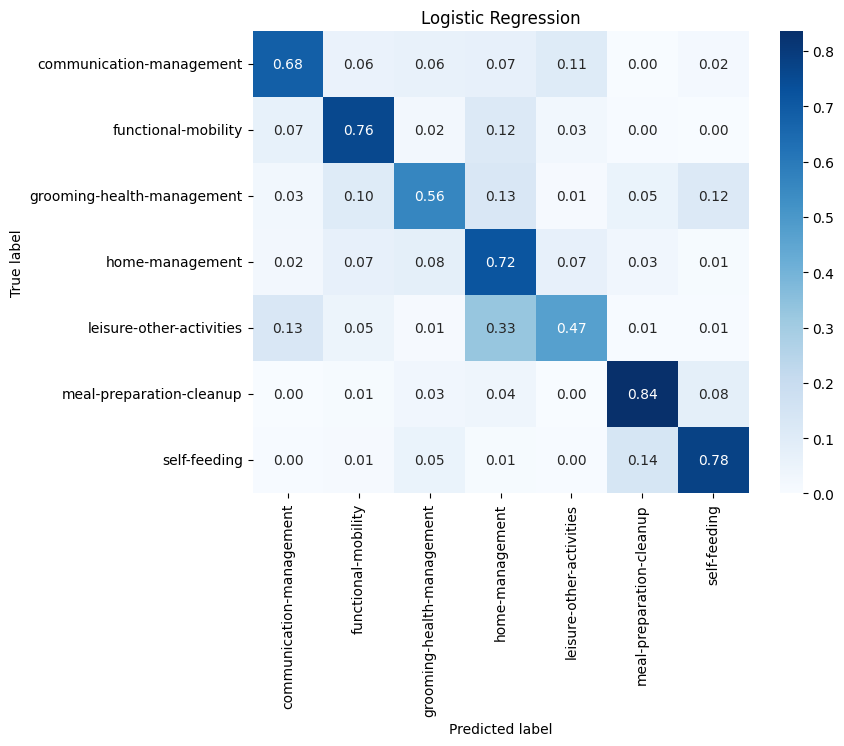

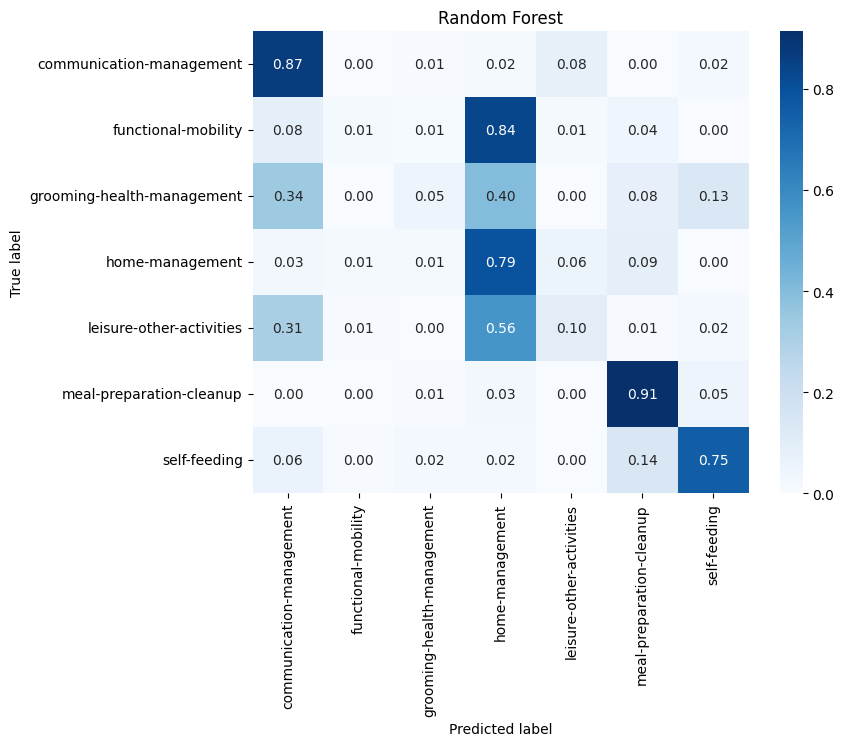

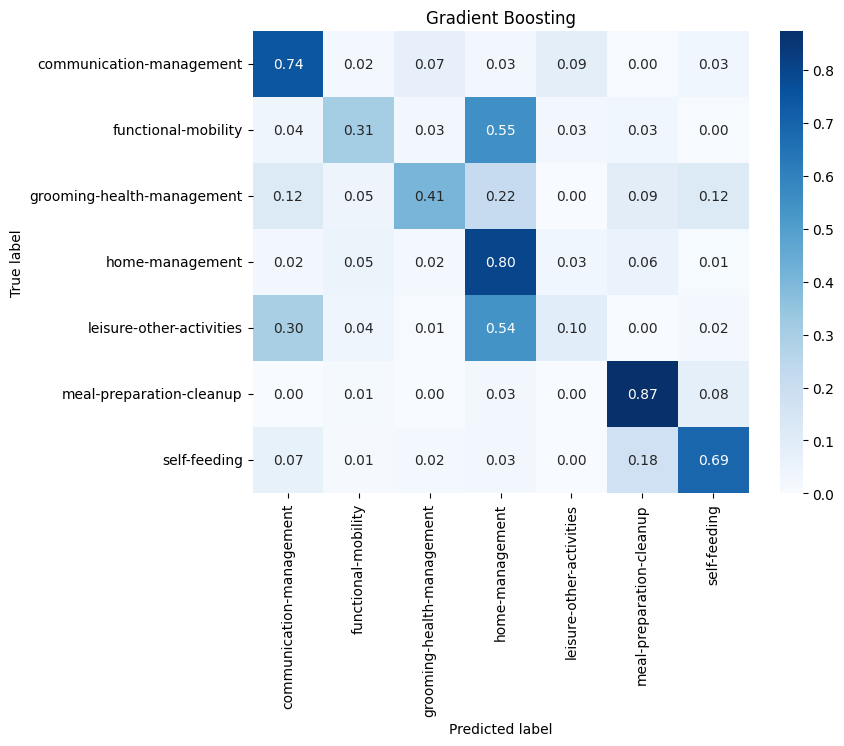

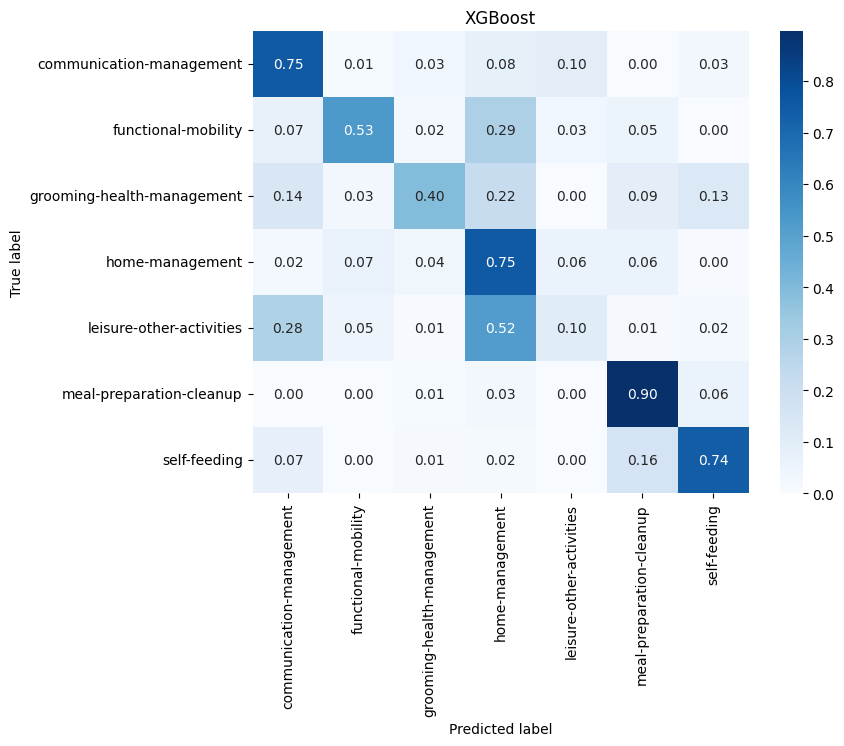

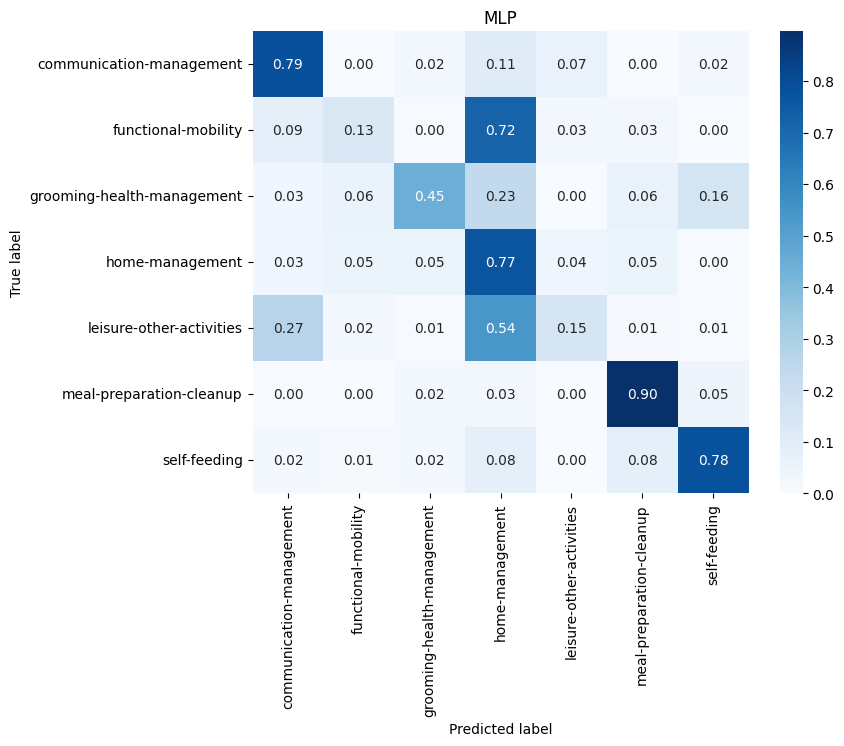

In [7]:
for i in range(len(results)):
    viz.plot_cm(results[i].cm, models[i][1], label_encoder, normalize=True, title=models[i][0])

In [8]:
ev.display_median_table(results_df_weighted)

,model,median_accuracy,median_precision,median_recall,median_f1
0,GradientBoostingClassifier,0.678504,0.447702,0.643983,0.495328
1,LogisticRegression,0.752013,0.511755,0.779894,0.512511
2,MLPClassifier,0.765739,0.530025,0.661896,0.486244
3,RandomForestClassifier,0.707784,0.569624,0.627367,0.534295
4,XGBClassifier,0.736616,0.498751,0.676979,0.490445


In [9]:
ev.display_pct_table(results_df_weighted)

,model,median_f1,pct_above_0.5
0,GradientBoostingClassifier,0.495328,0.50
1,LogisticRegression,0.512511,0.50
2,MLPClassifier,0.486244,0.50
3,RandomForestClassifier,0.534295,0.62
4,XGBClassifier,0.490445,0.50
